In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
books = pd.read_csv('bestsellers with categories.csv')

In [4]:
books = books.drop_duplicates('Name').sort_values(['User Rating', 'Reviews'], ascending=False)
gapminder = pd.read_csv('gapminder_data.csv')
student = pd.read_csv('StudentsPerformance.csv')
student['total score'] = student[['math score', 'reading score', 'writing score']].apply(np.mean, axis=1)
iot = pd.read_csv('IOT-temp.csv', nrows=100)

In [5]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction


In [6]:
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,NaN,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.654122,48.673,NaN,0.0,NaN,6.684385,55.700001,24.04
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,0.1,12.500073,73.131,0.420095,2.0,590.509814,4.848770,50.500000,65.22
3,Andorra,21943.339900,10.17,NaN,NaN,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,5.362179,NaN,88.92
4,Angola,1381.004268,5.57,1.461329,23.1,2.483580e+08,69.400002,2.0,9.999954,51.093,NaN,-2.0,172.999227,14.554677,75.699997,56.70


In [7]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [8]:
iot.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


# Relational Plot

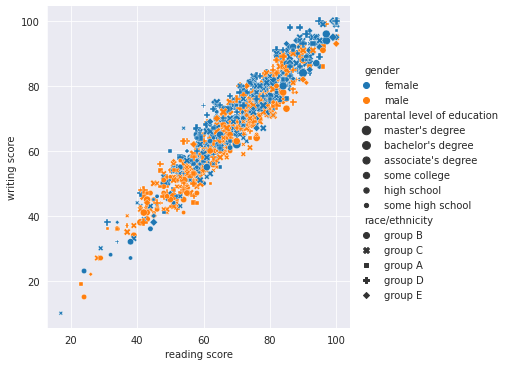

In [9]:
sns.relplot(x="reading score", 
            y="writing score", 
            hue="gender", 
            style="race/ethnicity", 
            size="parental level of education",
            size_order=["master's degree", 
                        "bachelor's degree", 
                        "associate's degree", 
                        'some college', 
                        'high school', 
                        'some high school'],
            data=student)

## Line

Sorts ***values*** by ***x*** \[Default\].
Use ```sort=False```.

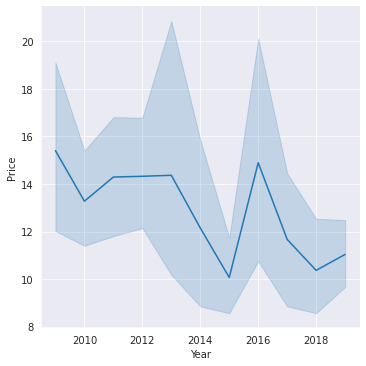

In [10]:
sns.relplot(x="Year", y="Price", kind='line', data=books)

## Confidence Interval

For same value of **x** variable measurements are aggregated by default by ploting line at __mean__ & around 95% confidence interval.

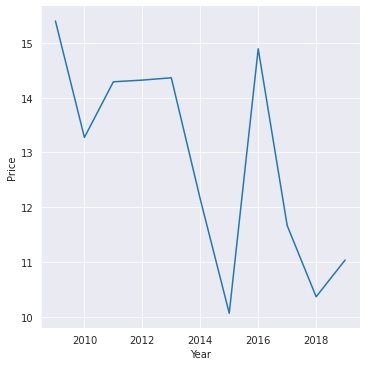

In [11]:
sns.relplot(x="Year", y="Price", kind='line', ci=None, data=books)

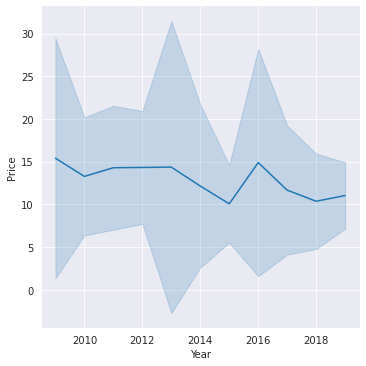

In [12]:
sns.relplot(x="Year", y="Price", kind='line', ci='sd', data=books) # std

Agregation can be turned off by setting ``estimator =``**``None``**

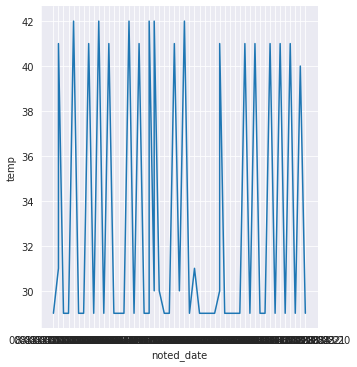

In [13]:
sns.relplot(x="noted_date", y="temp", kind='line', estimator=None, data=iot)

## Semantic Mapping

### Hue & Markers

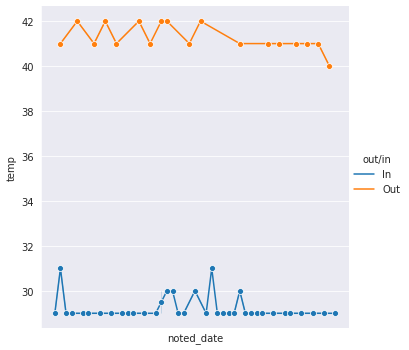

In [14]:
sns.relplot(data=iot, x="noted_date", y="temp", kind='line', hue="out/in", marker='o')
plt.xticks([])
plt.show()

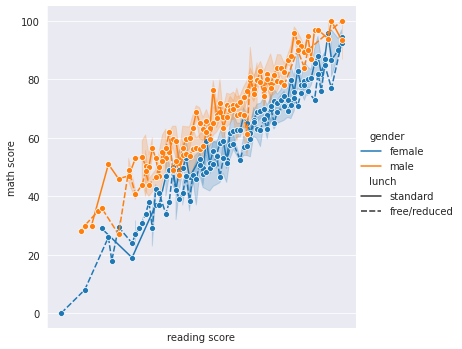

In [15]:
sns.relplot(data=student, 
            x='reading score', 
            y="math score", 
            kind='line', 
            hue="gender", 
            style="lunch", 
            marker='o')
plt.xticks([])
plt.show()

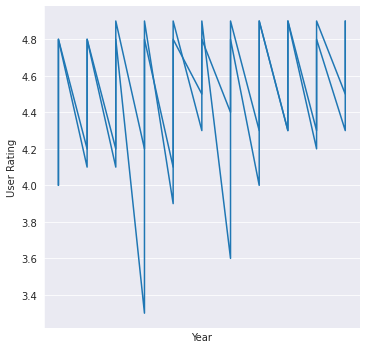

In [16]:
sns.relplot(data=books, x='Year', y="User Rating", kind='line', estimator=None, units='Genre')
plt.xticks([])
plt.show()

### Columns & Rows

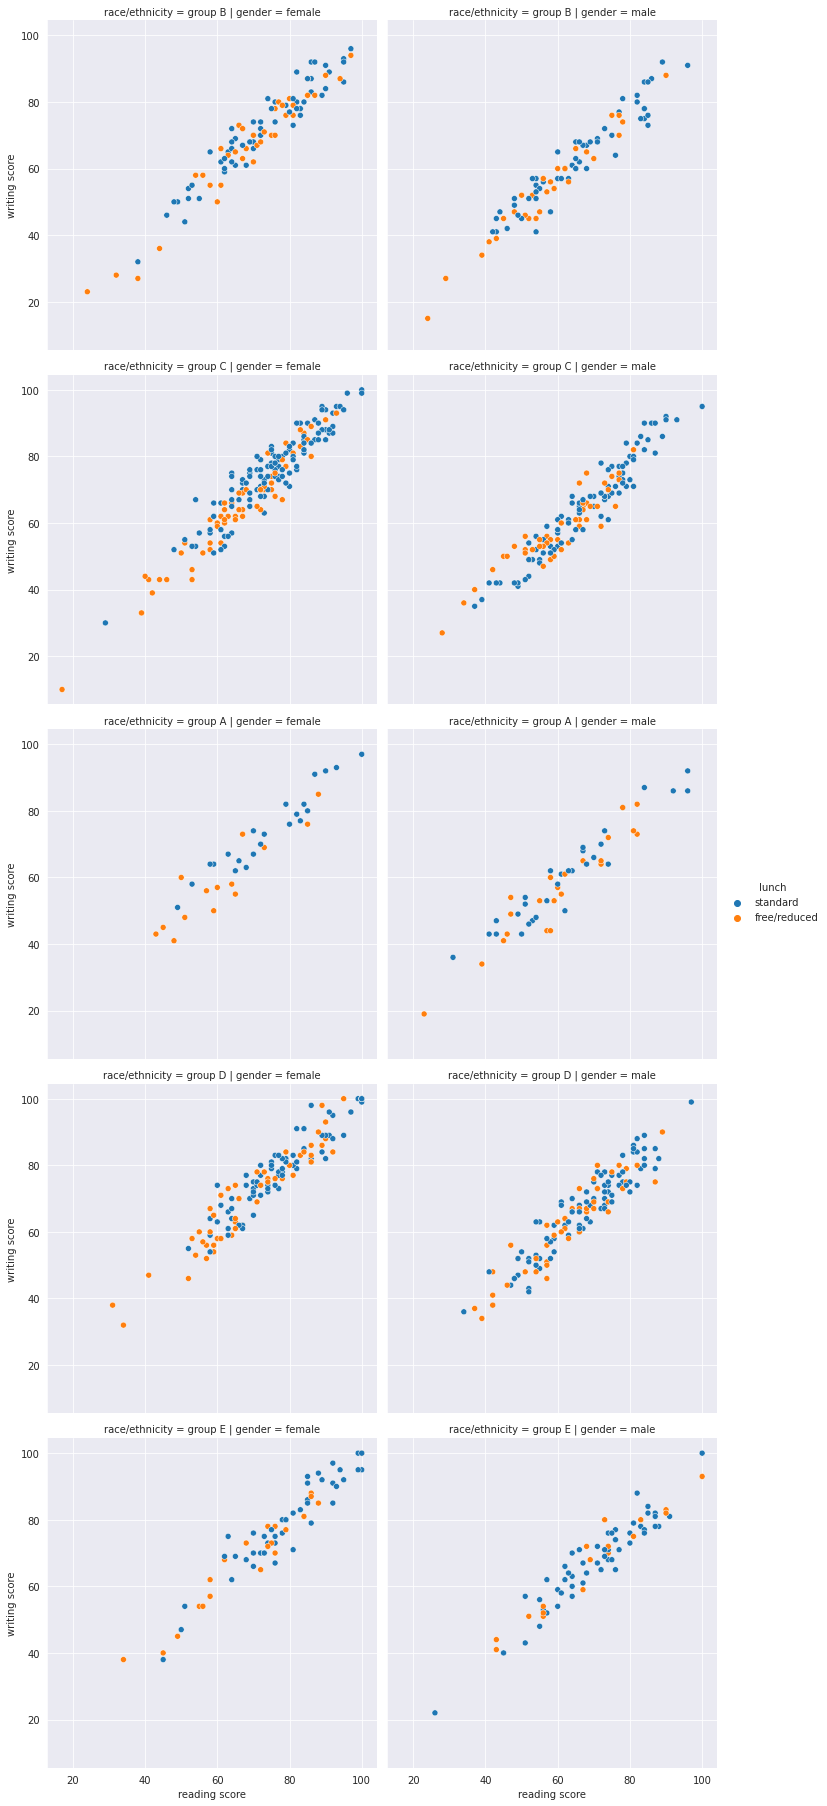

In [17]:
sns.relplot(data=student, 
            x="reading score", 
            y="writing score", 
            col="gender", 
            row="race/ethnicity", 
            hue='lunch')

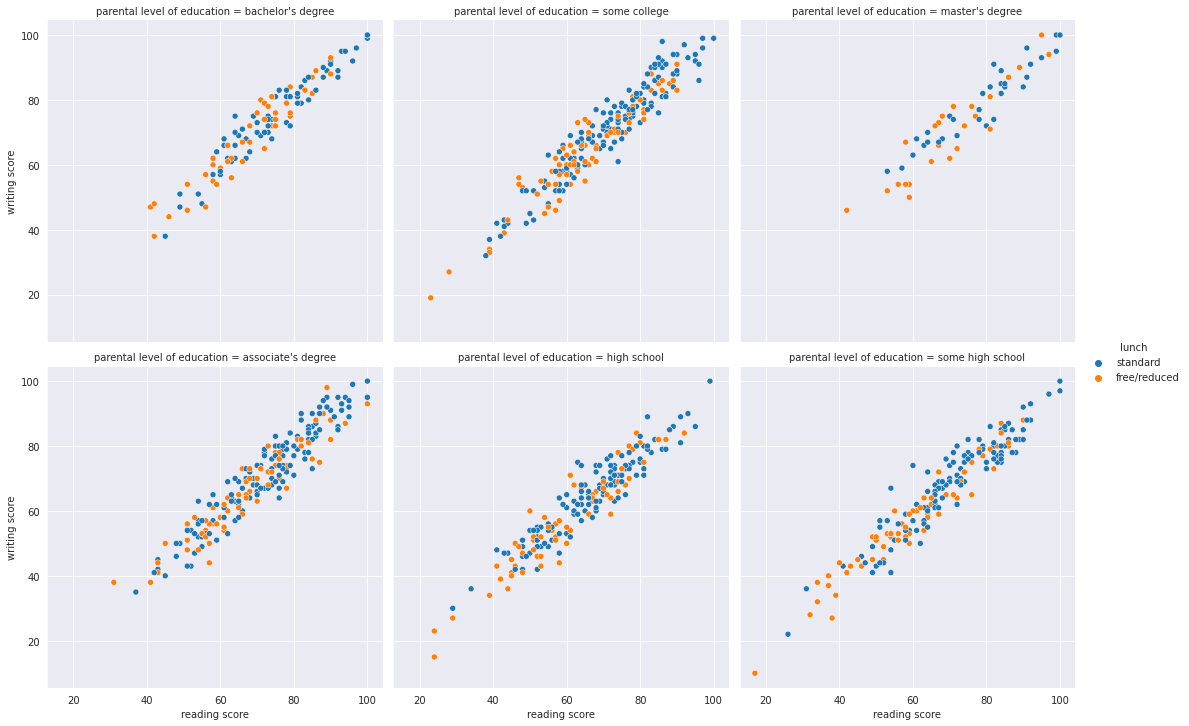

In [18]:
sns.relplot(data=student, 
            x="reading score", 
            y="writing score", 
            col="parental level of education", 
            col_wrap=3, 
            hue='lunch')

# Distribution

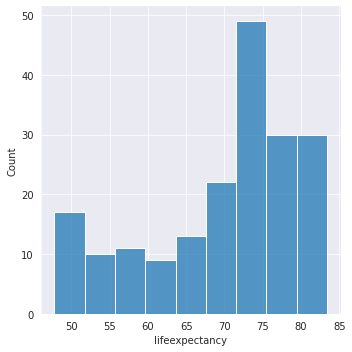

In [19]:
sns.displot(gapminder, x="lifeexpectancy")

## Bins

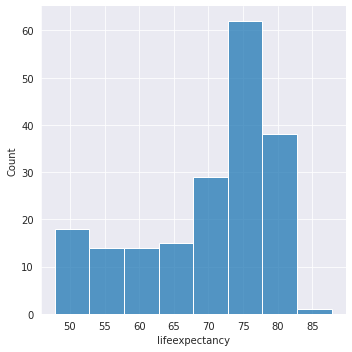

In [20]:
sns.displot(gapminder, x="lifeexpectancy", binwidth=5)

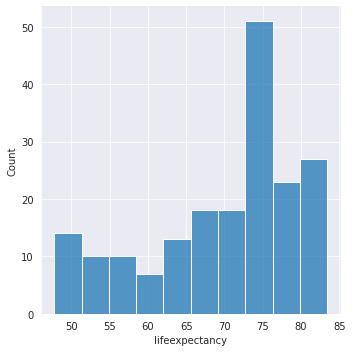

In [21]:
sns.displot(gapminder, x="lifeexpectancy", bins=10)

### Specifying Custom bin Ranges

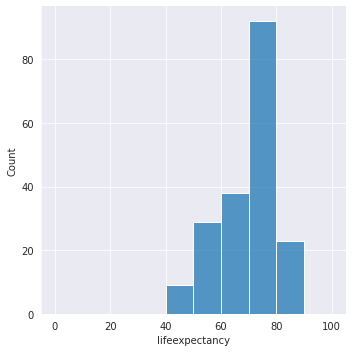

In [22]:
sns.displot(gapminder, x="lifeexpectancy", bins=[0,40,50,60,70,80,90,100])

### Bin for Each Distinct Value

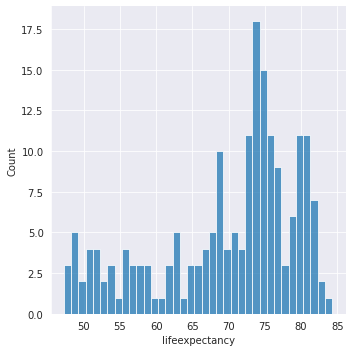

In [23]:
sns.displot(gapminder, x="lifeexpectancy", discrete=True)

### Shrinking Bin Width

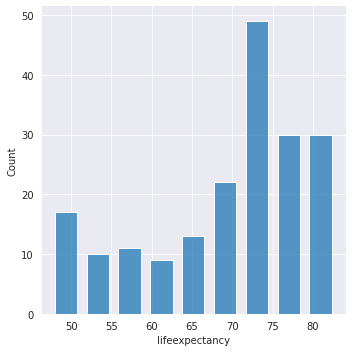

In [24]:
sns.displot(gapminder, x="lifeexpectancy", shrink=0.7)

## Conditioning

### Hue

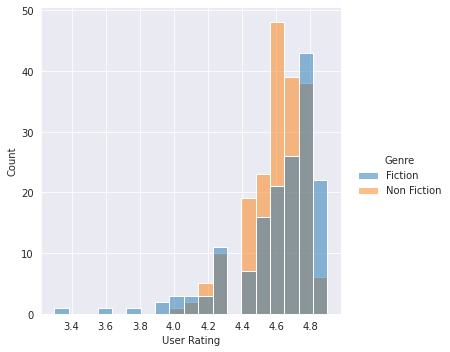

In [25]:
sns.displot(books, x="User Rating", hue="Genre")

### element to plot as

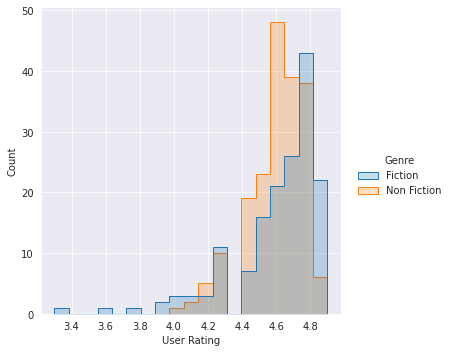

In [26]:
sns.displot(books, x="User Rating", hue="Genre", element="step")

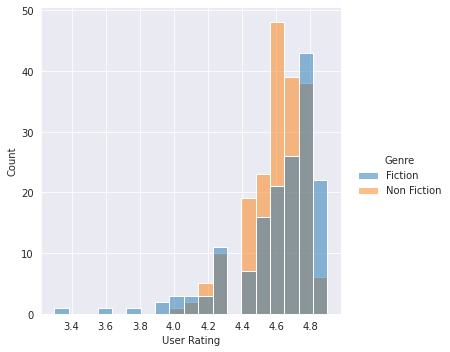

In [27]:
sns.displot(books, x="User Rating", hue="Genre", element="bars")

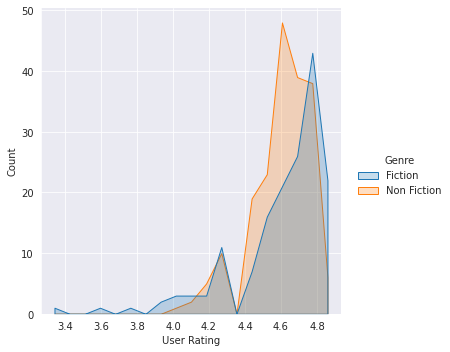

In [28]:
sns.displot(books, x="User Rating", hue="Genre", element="poly")

### Multiple Element to stack/dodge

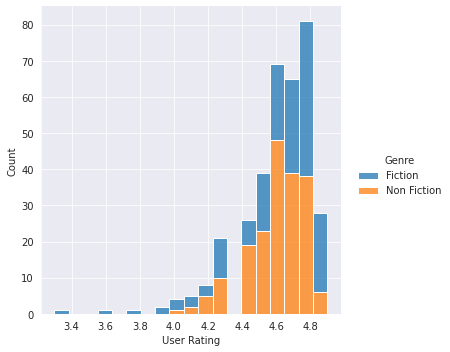

In [29]:
sns.displot(books, x="User Rating", hue="Genre", element="bars", multiple='stack')

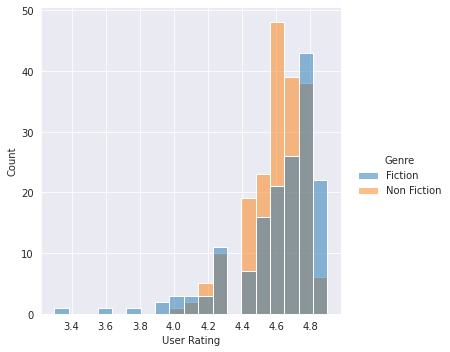

In [30]:
sns.displot(books, x="User Rating", hue="Genre", element="bars", multiple='layer')

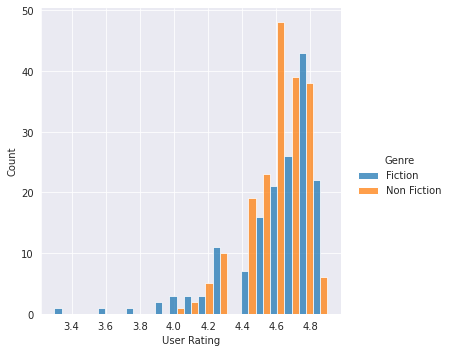

In [31]:
sns.displot(books, x="User Rating", hue="Genre", element="bars", multiple='dodge')

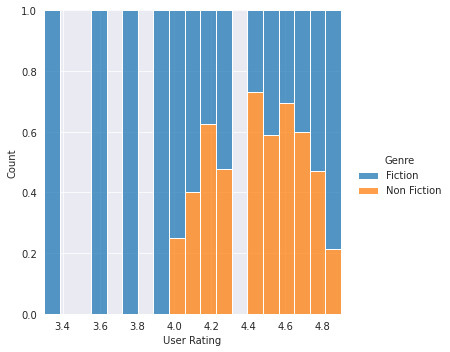

In [32]:
sns.displot(books, x="User Rating", hue="Genre", element="bars", multiple='fill')

### Using colos to show Conditions

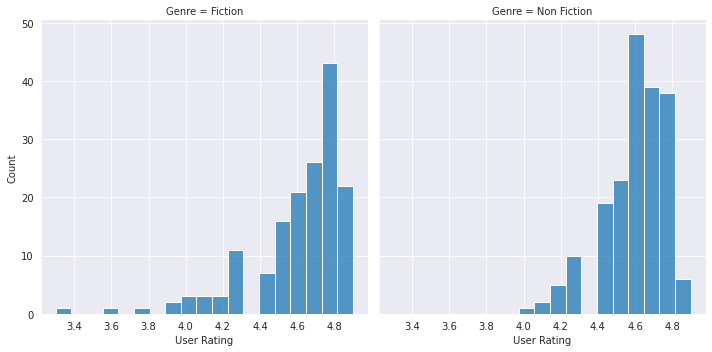

In [33]:
sns.displot(books, x="User Rating", col="Genre")

## Normalizing Distribution

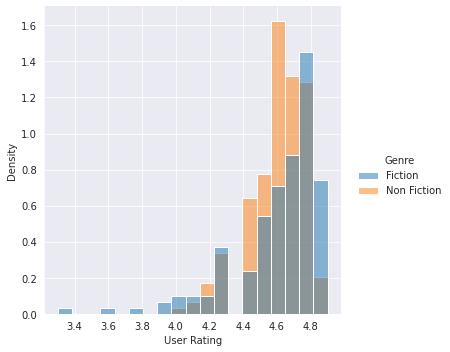

In [34]:
sns.displot(books, x="User Rating", hue="Genre", stat='density')

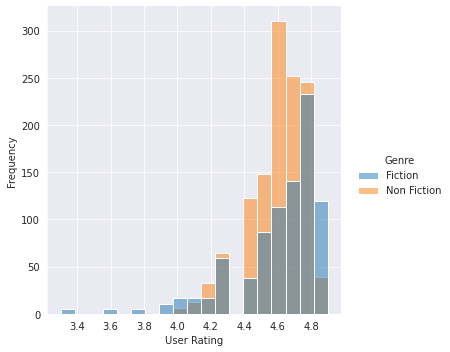

In [35]:
sns.displot(books, x="User Rating", hue="Genre", stat='frequency')

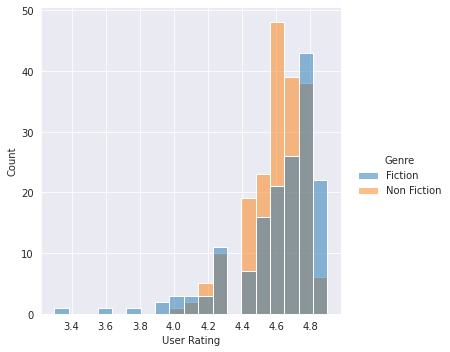

In [36]:
sns.displot(books, x="User Rating", hue="Genre", stat='count') #Default

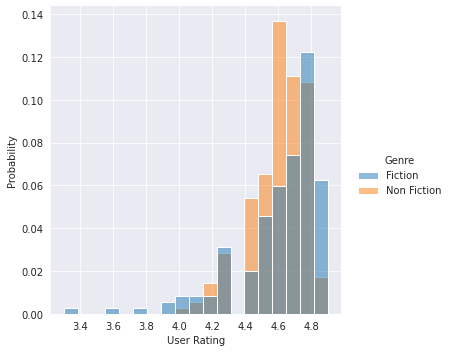

In [37]:
sns.displot(books, x="User Rating", hue="Genre", stat='probability')

By default whole distribution is normalized.
To normalize each subset independently use `common_norm = False`

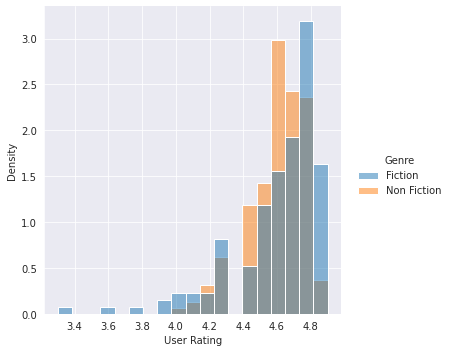

In [38]:
sns.displot(books, x="User Rating", hue="Genre", stat='density', common_norm=False)

## Kernel density estimation

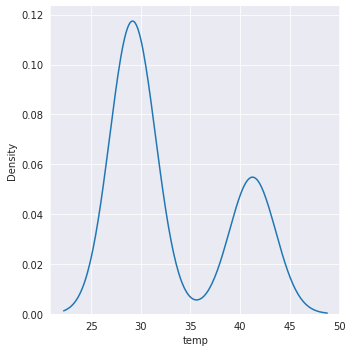

In [39]:
sns.displot(iot, x="temp", kind="kde")

### Smoothing

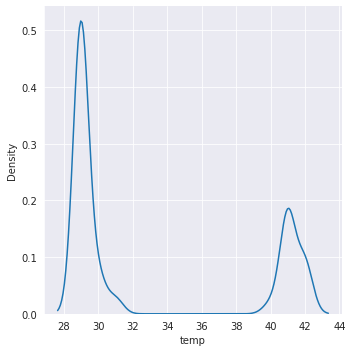

In [40]:
sns.displot(iot, x="temp", kind="kde", bw_adjust=0.2)

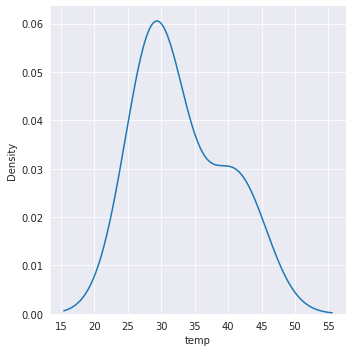

In [41]:
sns.displot(iot, x="temp", kind="kde", bw_adjust=2)

### Conditioning KDE

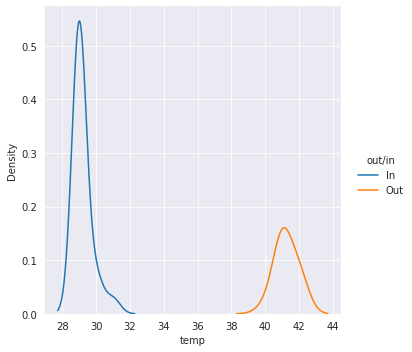

In [42]:
sns.displot(iot, x="temp", kind="kde", bw_adjust=2, hue='out/in')

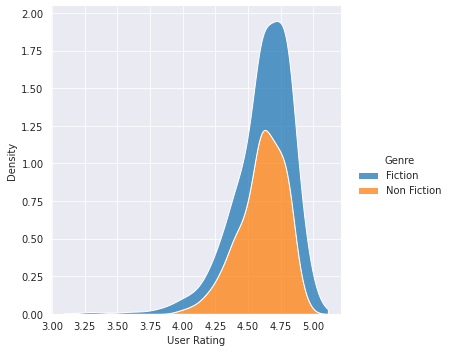

In [43]:
sns.displot(books, x="User Rating", hue="Genre", kind='kde', multiple='stack')

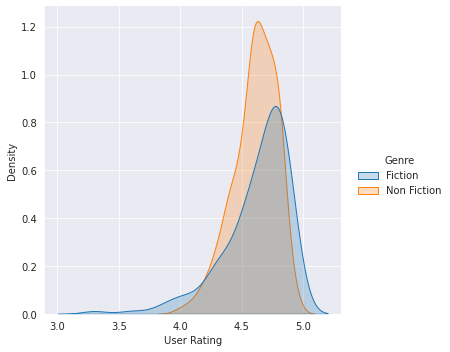

In [44]:
sns.displot(books, x="User Rating", hue="Genre", kind='kde', fill=True)

## KDE on Histogram

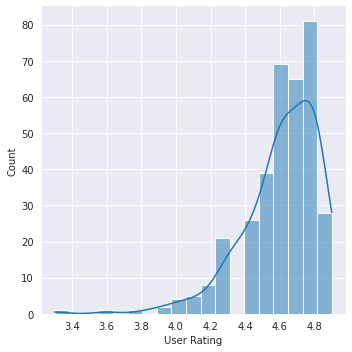

In [45]:
sns.displot(books, x="User Rating", kde=True)

## Empirical Cummulative Distribution

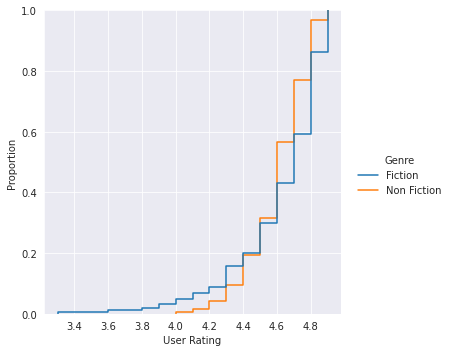

In [46]:
sns.displot(books, x="User Rating", hue="Genre", kind='ecdf')

## Bivariate Distributions

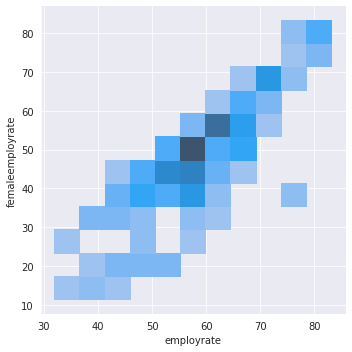

In [47]:
sns.displot(gapminder, x="employrate", y="femaleemployrate")

### Bivariate KDE

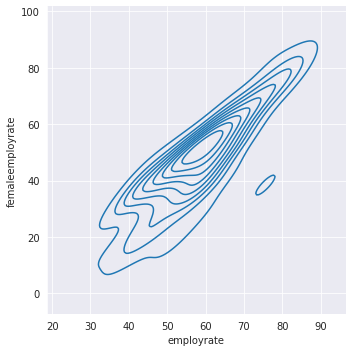

In [48]:
sns.displot(gapminder, x="employrate", y="femaleemployrate", kind="kde")

### Conditions

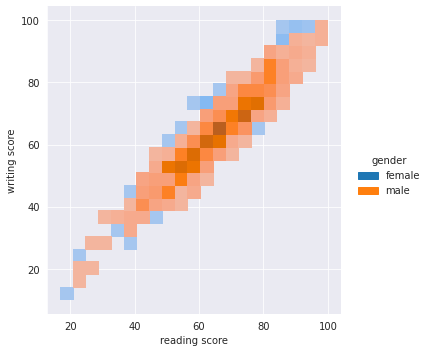

In [49]:
sns.displot(student, x="reading score", y="writing score", hue="gender")

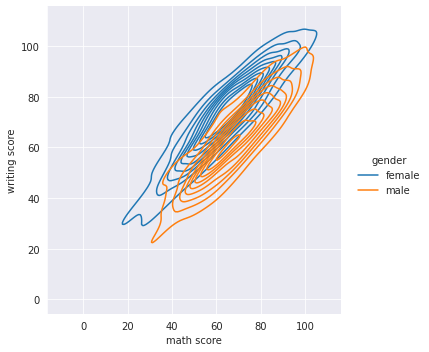

In [50]:
sns.displot(student, x="math score", y="writing score", hue="gender", kind='kde')

### Bins

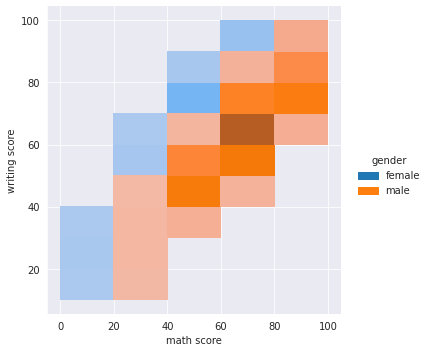

In [51]:
sns.displot(student, x="math score", y="writing score", hue="gender", binwidth=[20,10])

### Color Bar

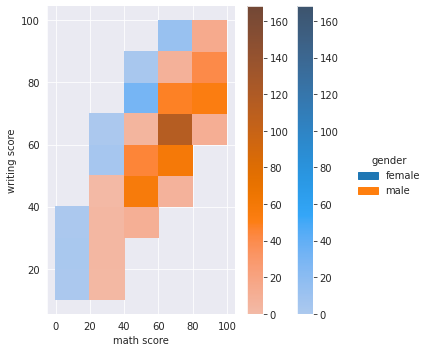

In [52]:
sns.displot(student, x="math score", y="writing score", hue="gender", binwidth=[20,10], cbar=True)

### Contour Threshold & levels

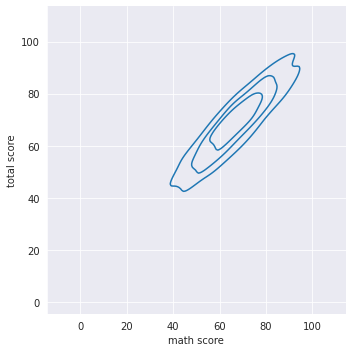

In [53]:
sns.displot(student, x="math score", y="total score", kind='kde', thresh=0.2, levels=4)

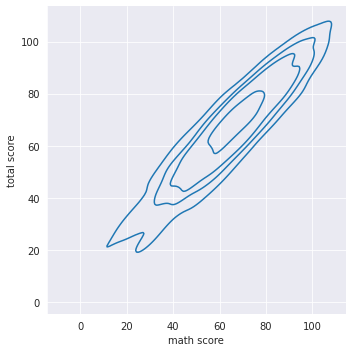

In [54]:
sns.displot(student, x="math score", y="total score", kind='kde', levels=[0.01,0.08,0.2,0.7,1])

## Discrete Variable

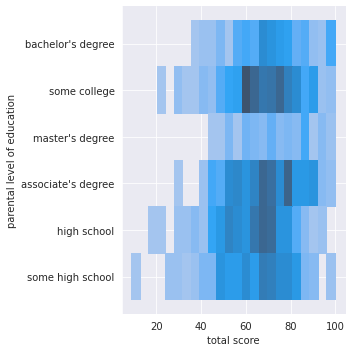

In [55]:
sns.displot(student, y="parental level of education", x="total score")

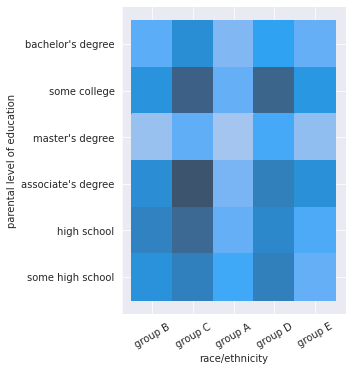

In [56]:
f = sns.displot(student, y="parental level of education", x="race/ethnicity")
f.set_xticklabels(rotation=30)

# JointPlot

In [57]:
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


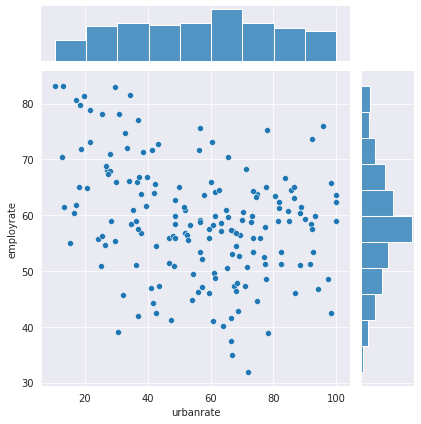

In [58]:
sns.jointplot(data=gapminder,
             x="urbanrate",
             y="employrate")

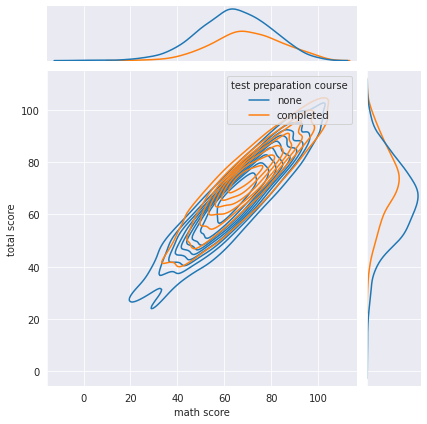

In [59]:
sns.jointplot(data=student,
             x="math score",
             y="total score",
             kind="kde",
             hue="test preparation course")

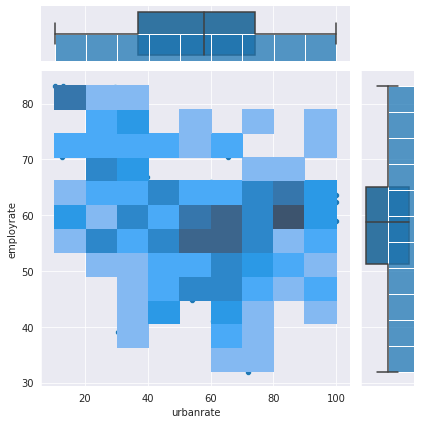

In [60]:
f = sns.jointplot(data=gapminder,
                  x="urbanrate",
                  y="employrate")
f.plot_joint(sns.histplot)
f.plot_marginals(sns.boxplot)

## Rug for Distribution

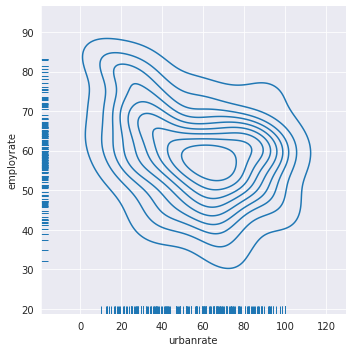

In [61]:
sns.displot(data=gapminder,
              x="urbanrate",
              y="employrate",
              kind="kde",
              rug=True)

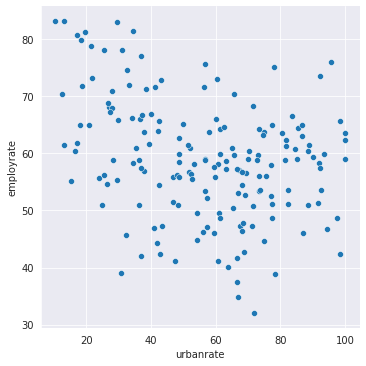

In [62]:
sns.relplot(data=gapminder,
              x="urbanrate",
              y="employrate")


<AxesSubplot:xlabel='urbanrate', ylabel='employrate'>

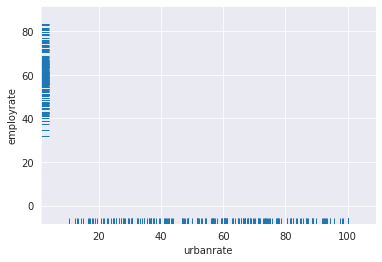

In [63]:
sns.rugplot(data=gapminder,
              x="urbanrate",
              y="employrate")

<AxesSubplot:xlabel='urbanrate', ylabel='employrate'>

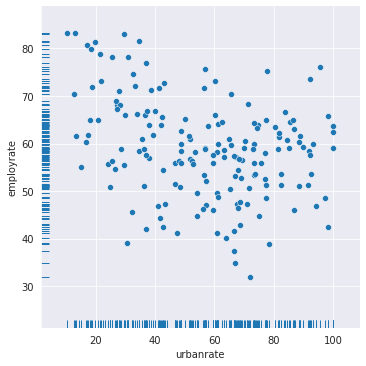

In [64]:
sns.relplot(data=gapminder,
              x="urbanrate",
              y="employrate")

sns.rugplot(data=gapminder,
              x="urbanrate",
              y="employrate")

## Pair plots

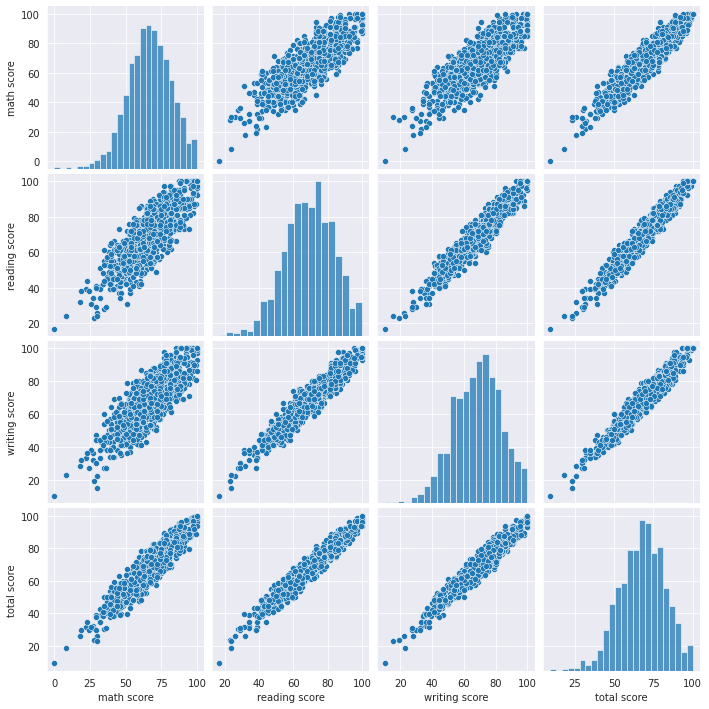

In [65]:
sns.pairplot(student)

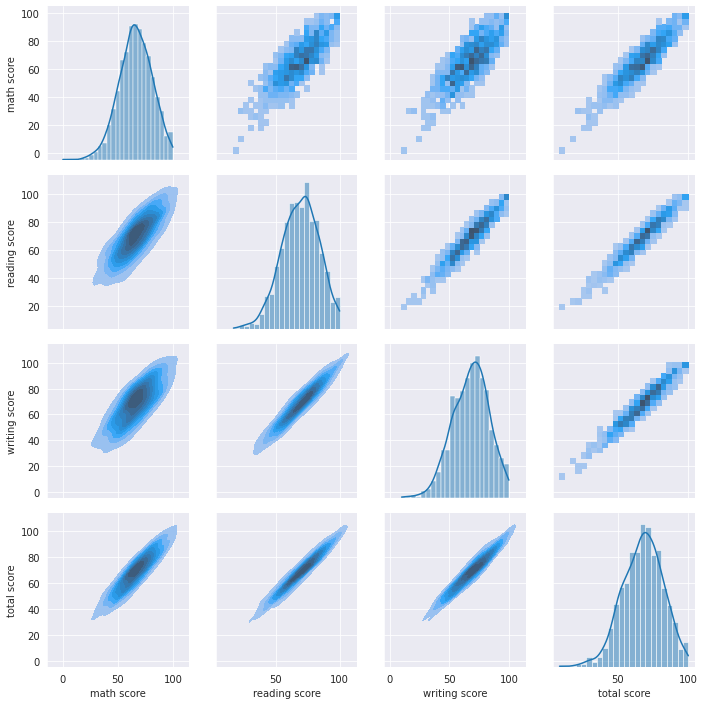

In [66]:
f = sns.PairGrid(student)

f.map_upper(sns.histplot)
f.map_lower(sns.kdeplot, fill=True)
f.map_diag(sns.histplot, kde=True)

# Categorical Data

- Categorical scatterplots:

    `stripplot()` (with `kind="strip"`; the default)

    `swarmplot()` (with `kind="swarm"`)
    

- Categorical distribution plots:

    `boxplot()` (with `kind="box"`)

    `violinplot()` (with `kind="violin"`)

    `boxenplot()` (with `kind="boxen"`)
    

- Categorical estimate plots:

    `pointplot()` (with `kind="point"`)

    `barplot()` (with `kind="bar"`)

    `countplot()` (with `kind="count"`)

## Scatter

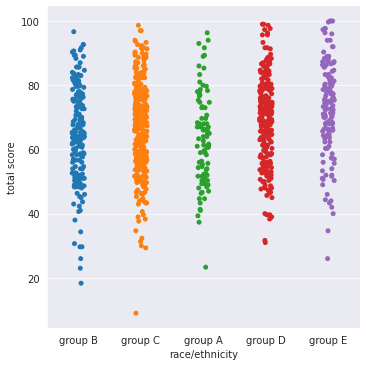

In [67]:
sns.catplot(data=student, x="race/ethnicity", y="total score")

### Jitter
`jitter` parameter controls magnitude of jitter

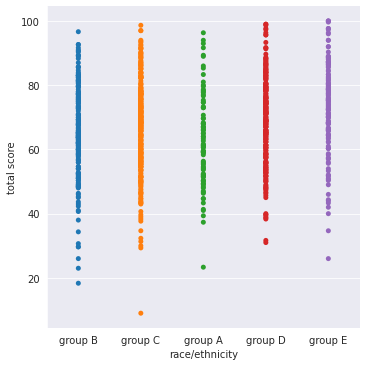

In [92]:
sns.catplot(data=student, x="race/ethnicity", y="total score", jitter=False)

### Hue

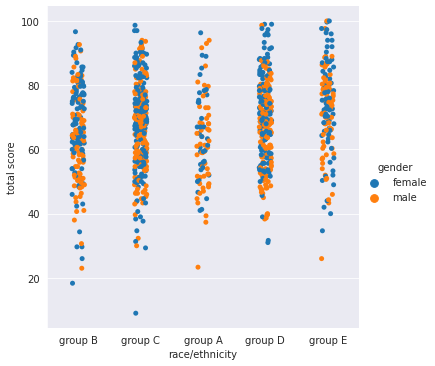

In [69]:
sns.catplot(data=student, x="race/ethnicity", y="total score", hue="gender")

### Swarmplot

/home/greenalien/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/greenalien/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


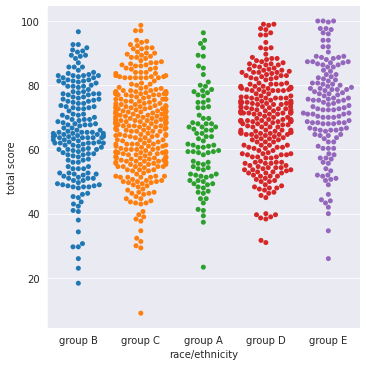

In [70]:
sns.catplot(data=student, x="race/ethnicity", y="total score", kind="swarm") # Default Stripplot

### Label Order

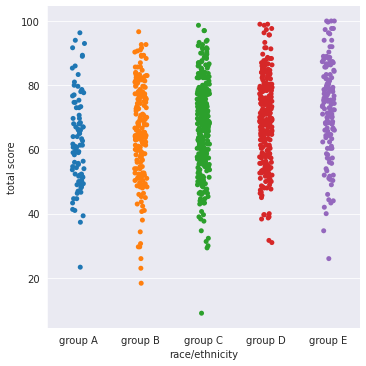

In [71]:
sns.catplot(data=student, x="race/ethnicity", y="total score", order=["group A", "group B", "group C", "group D", "group E"])

### Changing Categorical Axis

/home/greenalien/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/greenalien/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


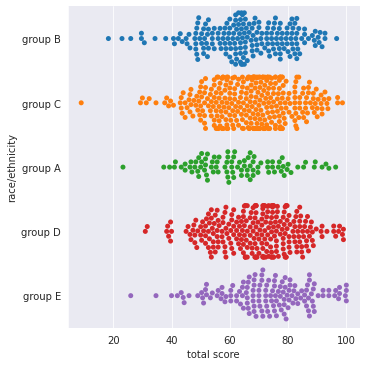

In [72]:
sns.catplot(data=student, y="race/ethnicity", x="total score", kind="swarm")

## Box Plot

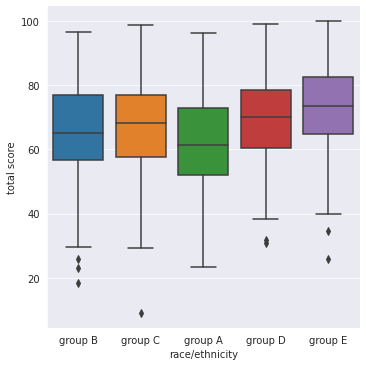

In [73]:
sns.catplot(data=student, x="race/ethnicity", y="total score", kind="box") # Default Stripplot

### Hue

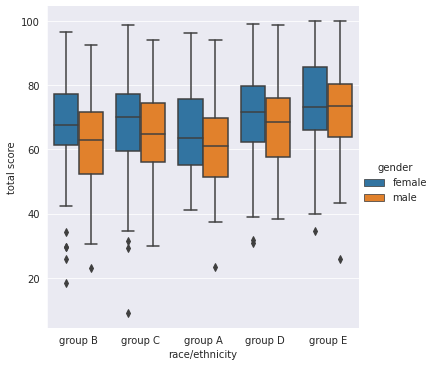

In [74]:
sns.catplot(data=student, x="race/ethnicity", y="total score", hue="gender", kind="box") # Default Stripplot

### Dodging Hue

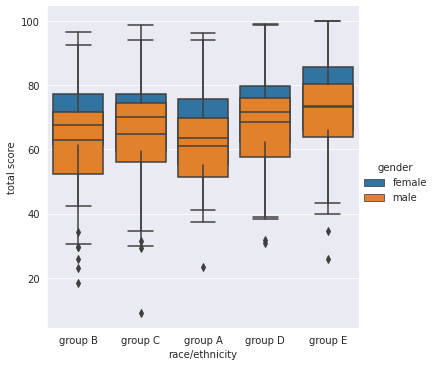

In [75]:
sns.catplot(data=student, x="race/ethnicity", y="total score", hue="gender", kind="box", dodge=False) # Default Stripplot

### BOXN (Diamond plot)

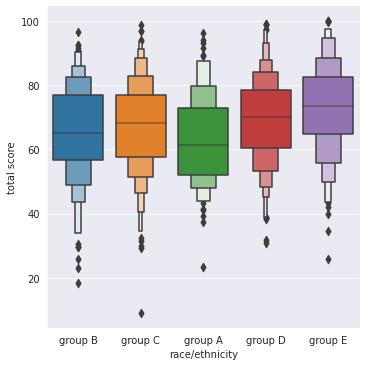

In [76]:
sns.catplot(data=student, x="race/ethnicity", y="total score", kind="boxen", dodge=False) # Default Stripplot

## Violinplots

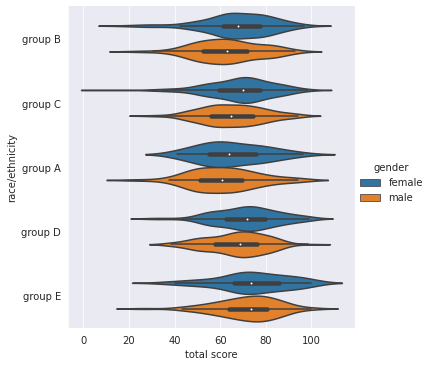

In [77]:
sns.catplot(data=student, y="race/ethnicity", x="total score", hue="gender", kind="violin") # Default Stripplot

### ViolinPlot KDE Parameters

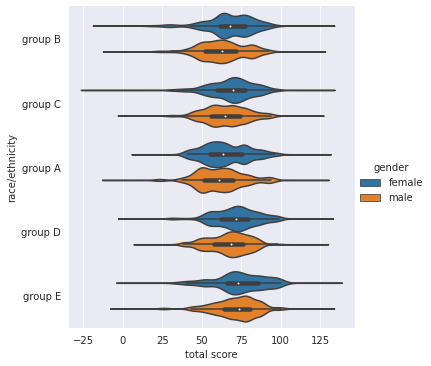

In [78]:
sns.catplot(data=student, y="race/ethnicity", x="total score", hue="gender", kind="violin", cut=10, bw=0.25)

### Spit in Hue

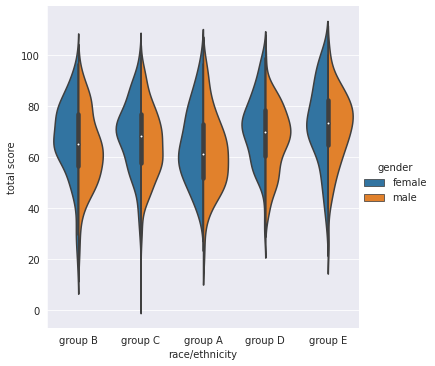

In [79]:
sns.catplot(data=student, x="race/ethnicity", y="total score", hue="gender", kind="violin", split=True)

### Voilin plot Other Options

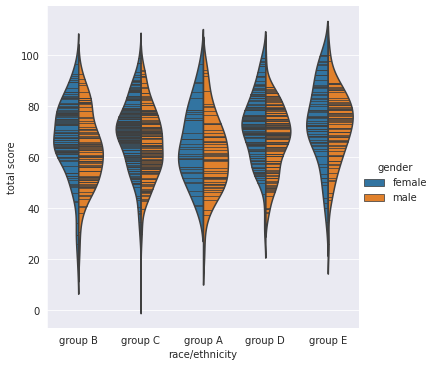

In [89]:
sns.catplot(data=student, x="race/ethnicity", y="total score", hue="gender", kind="violin", split=True, inner='stick')

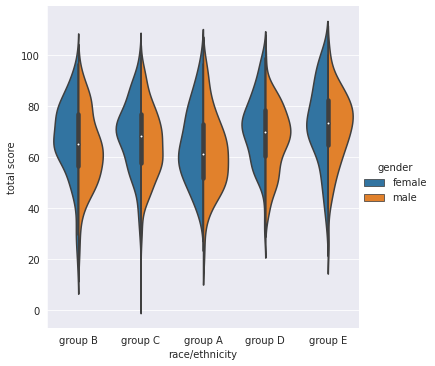

In [88]:
sns.catplot(data=student, x="race/ethnicity", y="total score", hue="gender", kind="violin", split=True, inner='box')

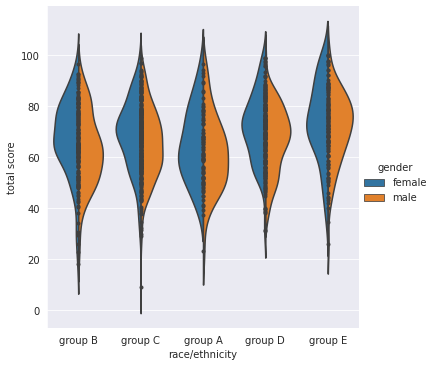

In [87]:
sns.catplot(data=student, x="race/ethnicity", y="total score", hue="gender", kind="violin", split=True, inner='point')

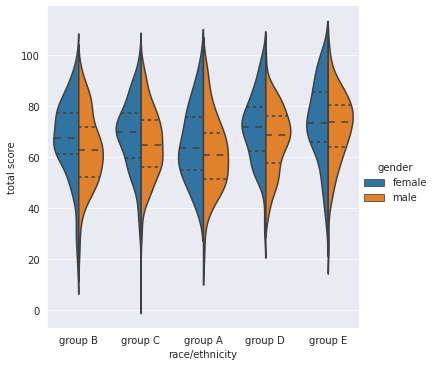

In [86]:
sns.catplot(data=student, x="race/ethnicity", y="total score", hue="gender", kind="violin", split=True, inner='quartile')

### Voilin Plot with swarmplot

<AxesSubplot:xlabel='race/ethnicity', ylabel='total score'>

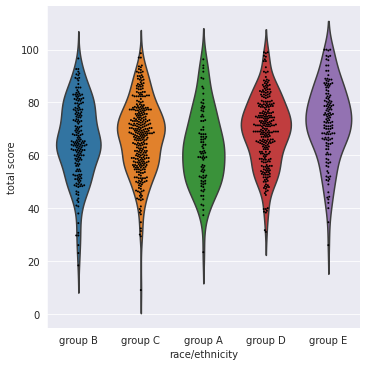

In [90]:
f = sns.catplot(data=student, x="race/ethnicity", y="total score", kind="violin", split=True, inner=None)
sns.swarmplot(data=student, x="race/ethnicity", y="total score", color='k', size=2, ax=f.ax)

## Bar Plot

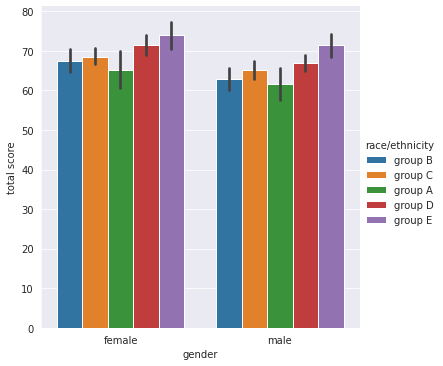

In [96]:
sns.catplot(data=student, x="gender", y="total score", hue="race/ethnicity", kind="bar")

## CountPlot

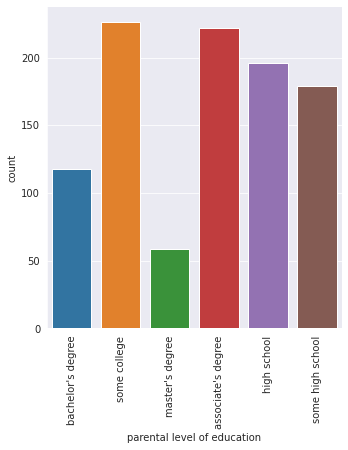

In [107]:
f = sns.catplot(data=student, x="parental level of education", kind="count")
f.set_xticklabels(rotation=90)

TypeError: object of type 'float' has no len()

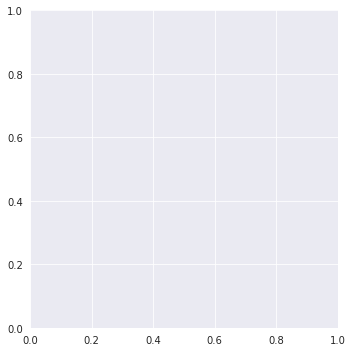

In [110]:
f = sns.catplot(data=student, y="parental level of education", kind="count", hue="gender", edgecolor=0.6)
# f.set_xticklabels(rotation=90)